In [1]:
import sklearn

import xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,make_scorer
from scipy.stats import pearsonr,uniform,randint
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from bayes_opt import BayesianOptimization
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from gpboost import GPBoostRegressor
import time
from sklearn.model_selection import cross_val_score
import warnings

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train = pd.read_csv(r"C:\Users\dell\Downloads\154train (1).csv")
test = pd.read_csv(r"G:\My Drive\78test.csv")

In [3]:
x_train = train.iloc[:,:train.shape[1]-1]
y_train = train.iloc[:,train.shape[1]-1]
x_test = test.iloc[:,:test.shape[1]-1]
y_test = test.iloc[:,test.shape[1]-1]

In [4]:
scaler = StandardScaler()

# Fit the scaler to your training data
scaler.fit(x_train)

# Transform both the training and testing data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` in

In [5]:
# Convert the scaled data back to a Pandas DataFrame for easy viewing
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=train.columns[:-1])

# Print the first 5 rows
print(x_train_scaled_df.head())

         Ps        Pw    Skew     Velocity     Depth       D50     Gradation  
0 -1.305053 -0.050728 -0.498680     1.419327  0.511295  1.912651     -0.757727
1 -1.305053 -0.050728 -0.498680     1.531879  0.186751  1.912651     -0.757727
2  1.566063  1.511695 -0.498680    -0.944269  0.061926 -0.693898     -0.572161
3  0.130505  2.379709 -0.498680     1.419327  1.285208 -0.700647     -0.695872
4 -1.305053 -0.918741  0.578412    -0.268956 -0.687022 -0.670652     -0.046391


In [6]:
print(f"scikit-learn version: {sklearn.__version__}")
print(f"xgboost version: {xgboost.__version__}")

scikit-learn version: 1.1.3
xgboost version: 2.1.3


In [7]:
def score(mod):
  return {
      "Train MAE":mean_absolute_error(mod.predict(x_train),y_train),
       "Test MAE": mean_absolute_error(mod.predict(x_test),y_test),
       "TESE MSE": mean_squared_error(mod.predict(x_test),y_test,squared=False),
       "Correlation":pearsonr(mod.predict(x_test),y_test)
  }


Training Linear Regression...
Best parameters: {'positive': True, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}
MSE: 0.2958
RMSE: 0.5438
Correlation: 0.8583

Training Decision Tree...
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
MSE: 0.2845
RMSE: 0.5334
Correlation: 0.8741

Training Random Forest...
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5}
MSE: 0.1394
RMSE: 0.3733
Correlation: 0.9440

Training Gradient Boosting...
Best parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5}
MSE: 0.1076
RMSE: 0.3281
Correlation: 0.9514

Training SVM...
Best parameters: {'kernel': 'rbf', 'gamma': 0.1, 'epsilon': 0.1, 'degree': 2, 'C': 10}
MSE: 0.1211
RMSE: 0.3480
Correlation: 0.9484

Training XGBoost...
Best parameters: {'subsample': 0.5, 'n_estimators': 500, 'min_child_weight': 1, 'max

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
7 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\

Best parameters: {'learning_rate': 0.01, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 3, 'border_count': 64}
MSE: 0.2666
RMSE: 0.5164
Correlation: 0.9052

Training GPBoost...
[GPBoost] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=1.0. Current value: lambda_l2=1.0
Best parameters: {'subsample': 0.9, 'num_leaves': 15, 'n_estimators': 100, 'min_child_samples': 1, 'max_depth': 3, 'learning_rate': 0.05, 'lambda': 1.0, 'colsample_bytree': 0.9, 'alpha': 0.5}
MSE: 0.1199
RMSE: 0.3462
Correlation: 0.9461


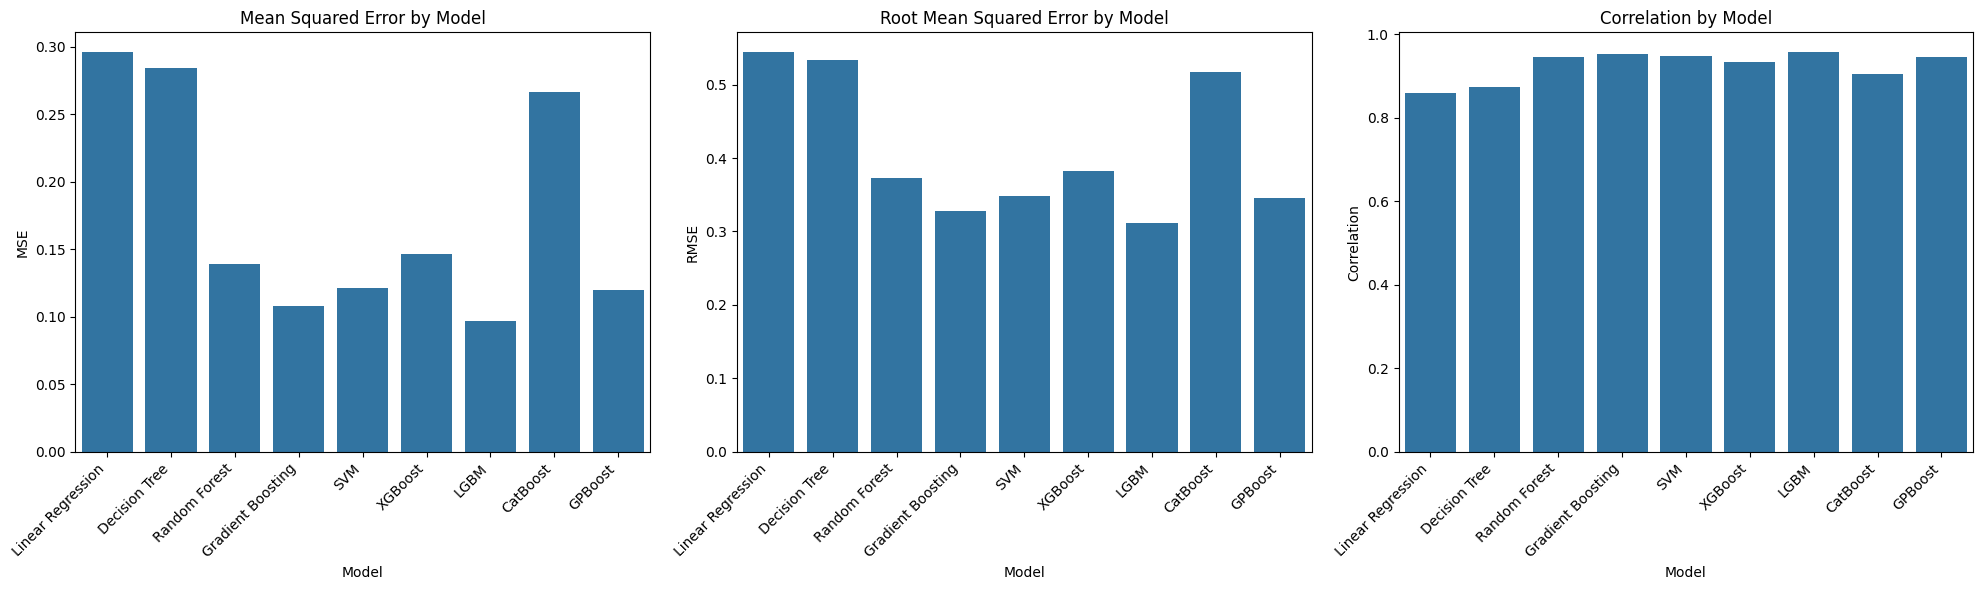


Best Model Summary:
Model: LGBM
MSE: 0.0967
RMSE: 0.3110
Correlation: 0.9563


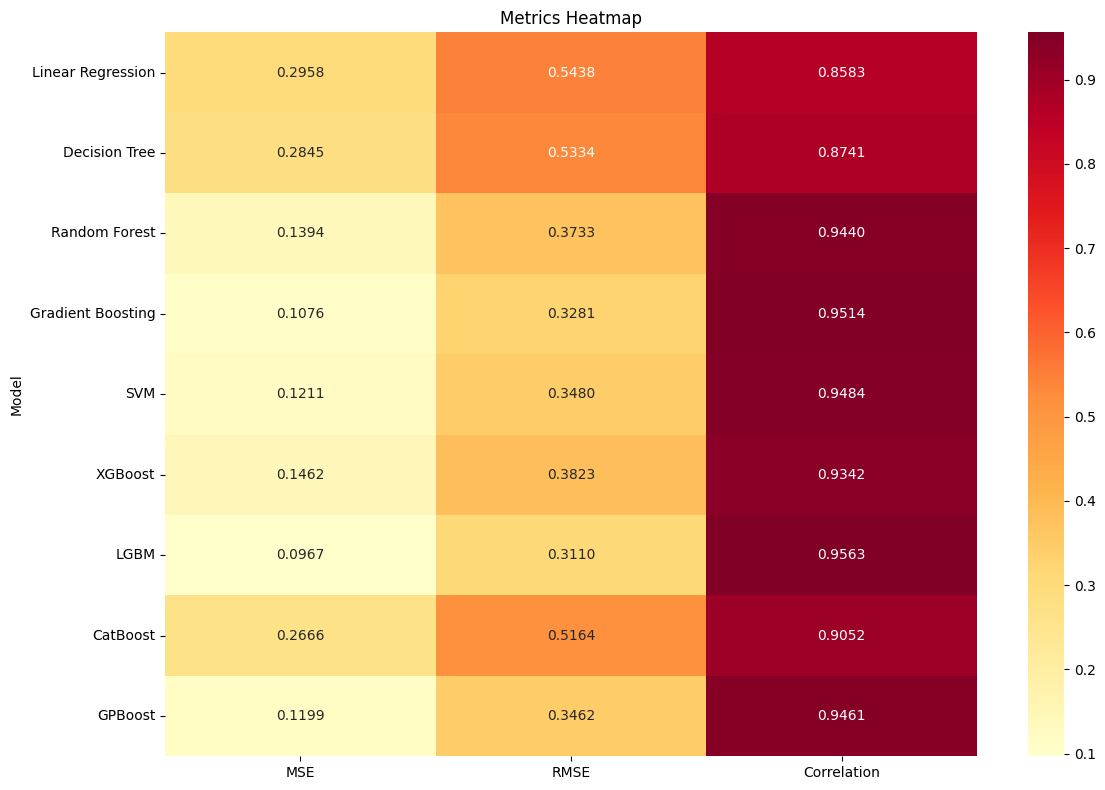

In [8]:


def hyperparameter_tuning_randomcv(x_train_scaled, y_train, x_test_scaled, y_test):
    # Define all models and their parameters
    models = {
        'Linear Regression': (LinearRegression(), {
            'fit_intercept': [True, False],
            'copy_X': [True, False],
            'n_jobs': [-1, None],
            'positive': [True, False]
        }),

        'Decision Tree': (DecisionTreeRegressor(), {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }),

        'Random Forest': (RandomForestRegressor(), {
            'n_estimators': [100, 200, 500],
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }),

        'Gradient Boosting': (GradientBoostingRegressor(), {
            'n_estimators': [100, 200, 500],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        }),

        'SVM': (SVR(), {
            'kernel': ['linear', 'rbf', 'poly'],
            'C': [0.1, 1, 10],
            'gamma': [0.01, 0.1, 1],
            'degree': [2, 3, 4],
            'epsilon': [0.01, 0.1, 1]
        }),

        'XGBoost': (XGBRegressor(objective='reg:squarederror'), {
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200, 300, 500],
            'min_child_weight': [1, 3, 5],
            'gamma': [0, 0.1, 0.5, 1],
            'subsample': [0.5, 0.7, 0.9],
            'colsample_bytree': [0.5, 0.7, 0.9]
        }),

        'LGBM': (LGBMRegressor(), {
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200, 300, 500],
            'num_leaves': [15, 31, 63],
            'min_child_samples': [1, 5, 10],
            'subsample': [0.5, 0.7, 0.9],
            'colsample_bytree': [0.5, 0.7, 0.9]
        }),

        'CatBoost': (CatBoostRegressor(verbose=0), {
            'learning_rate': [0.01, 0.05, 0.1],
            'iterations': [100, 200, 300, 500],
            'depth': [3, 5, 7],
            'l2_leaf_reg': [1, 3, 5],
            'border_count': [32, 64, 128]
        }),

        'GPBoost': (GPBoostRegressor(), {
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200, 300, 500],
            'num_leaves': [15, 31, 63],
            'min_child_samples': [1, 5, 10],
            'subsample': [0.5, 0.7, 0.9],
            'colsample_bytree': [0.5, 0.7, 0.9],
            'alpha': [0.1, 0.5, 1.0],
            'lambda': [0.1, 0.5, 1.0]
        })
    }

    # Dictionary to store results
    results = {
        'Model': [],
        'Best_Score': [],
        'MSE': [],
        'RMSE': [],
        'Correlation': []
    }
    
    # Number of iterations for RandomizedSearchCV
    n_iter = 10
    
    # Perform RandomizedSearchCV for each model
    for model_name, (model, params) in models.items():
        print(f"\nTraining {model_name}...")
        
        # Initialize RandomizedSearchCV
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=params,
            n_iter=n_iter,
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            random_state=42
        )
        
        # Fit the model
        try:
            random_search.fit(x_train_scaled, y_train)
            
            # Make predictions
            y_pred = random_search.predict(x_test_scaled)
            
            # Calculate metrics
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            correlation = np.corrcoef(y_test, y_pred)[0,1]
            
            # Store results
            results['Model'].append(model_name)
            results['Best_Score'].append(-random_search.best_score_)
            results['MSE'].append(mse)
            results['RMSE'].append(rmse)
            results['Correlation'].append(correlation)
            
            print(f"Best parameters: {random_search.best_params_}")
            print(f"MSE: {mse:.4f}")
            print(f"RMSE: {rmse:.4f}")
            print(f"Correlation: {correlation:.4f}")
            
        except Exception as e:
            print(f"Error training {model_name}: {str(e)}")
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Create visualizations
    plt.figure(figsize=(20, 6))
    
    # MSE Plot
    plt.subplot(131)
    sns.barplot(x='Model', y='MSE', data=results_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Mean Squared Error by Model')
    
    # RMSE Plot
    plt.subplot(132)
    sns.barplot(x='Model', y='RMSE', data=results_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Root Mean Squared Error by Model')
    
    # Correlation Plot
    plt.subplot(133)
    sns.barplot(x='Model', y='Correlation', data=results_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Correlation by Model')
    
    plt.tight_layout()
    plt.show()
    
    # Find best model
    best_model_idx = results_df['MSE'].idxmin()
    best_model = results_df.iloc[best_model_idx]
    
    print("\nBest Model Summary:")
    print(f"Model: {best_model['Model']}")
    print(f"MSE: {best_model['MSE']:.4f}")
    print(f"RMSE: {best_model['RMSE']:.4f}")
    print(f"Correlation: {best_model['Correlation']:.4f}")
    
    # Create a heatmap of the metrics
    plt.figure(figsize=(12, 8))
    metrics_df = results_df[['MSE', 'RMSE', 'Correlation']]
    metrics_df.index = results_df['Model']
    sns.heatmap(metrics_df, annot=True, cmap='YlOrRd', fmt='.4f')
    plt.title('Metrics Heatmap')
    plt.tight_layout()
    plt.show()
    
    return results_df

# Usage example:
# First prepare your data (x_train_scaled, y_train, x_test_scaled, y_test)
# Then call the function:
results = hyperparameter_tuning_randomcv(x_train_scaled, y_train, x_test_scaled, y_test)


Training Linear Regression...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Results for Linear Regression:
Best parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': True}
MSE: 0.2958
RMSE: 0.5438
Correlation: 0.8583
Training Time: 0.08 seconds

Training Decision Tree...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Results for Decision Tree:
Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
MSE: 0.4038
RMSE: 0.6355
Correlation: 0.8117
Training Time: 0.27 seconds

Training Random Forest...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Results for Random Forest:
Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 0.1516
RMSE: 0.3894
Correlation: 0.9333
Training Time: 114.59 seconds

Training Gradient Boosting...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits



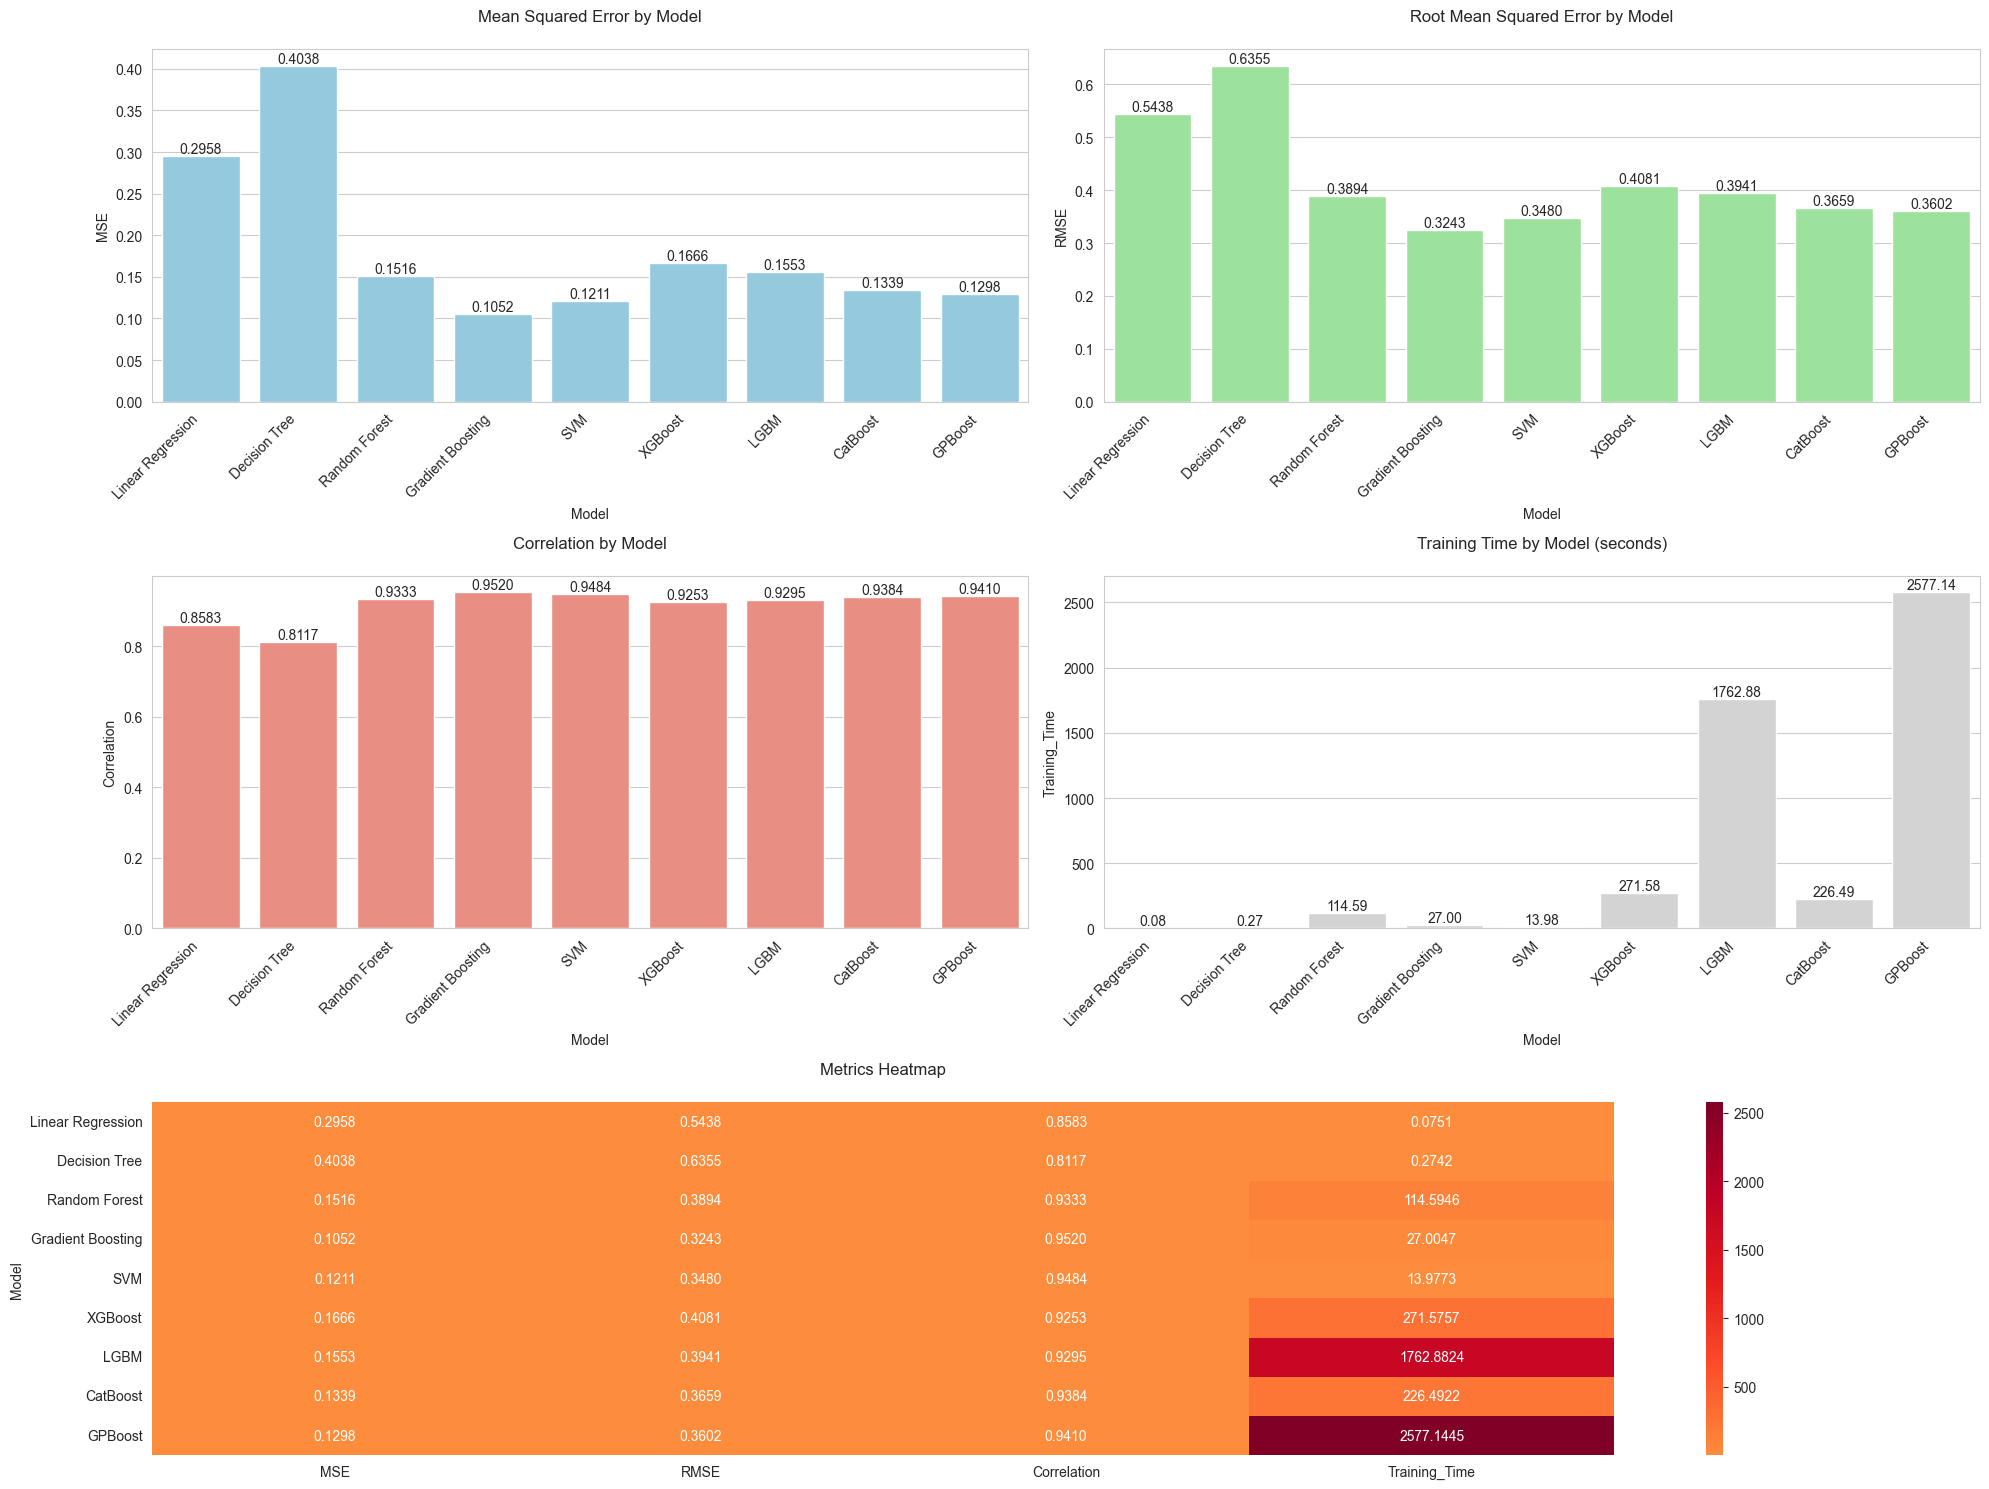

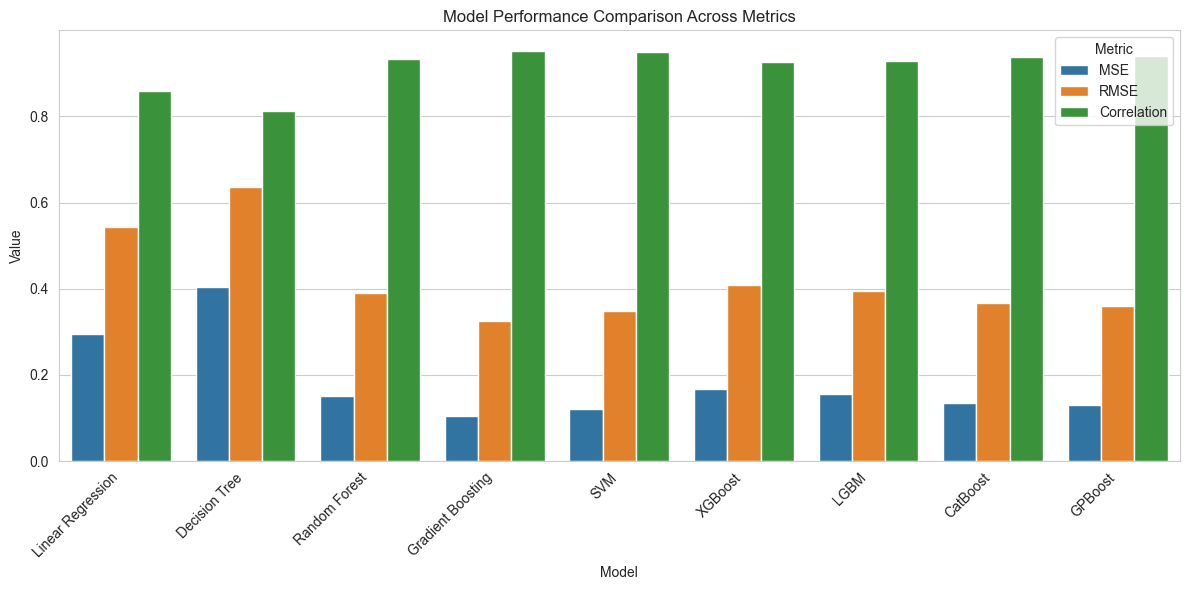


Best Model Summary:
Model: Gradient Boosting
MSE: 0.1052
RMSE: 0.3243
Correlation: 0.9520
Training Time: 27.00 seconds

Model Performance Comparison:
            Model  Best_Score    MSE   RMSE  Correlation  Training_Time
Gradient Boosting      0.3395 0.1052 0.3243       0.9520        27.0047
              SVM      0.2924 0.1211 0.3480       0.9484        13.9773
          GPBoost      0.3287 0.1298 0.3602       0.9410      2577.1445
         CatBoost      0.3372 0.1339 0.3659       0.9384       226.4922
    Random Forest      0.3529 0.1516 0.3894       0.9333       114.5946
             LGBM      0.3501 0.1553 0.3941       0.9295      1762.8824
          XGBoost      0.3373 0.1666 0.4081       0.9253       271.5757
Linear Regression      0.5330 0.2958 0.5438       0.8583         0.0751
    Decision Tree      0.3922 0.4038 0.6355       0.8117         0.2742


In [10]:


def hyperparameter_tuning_gridcv(x_train_scaled, y_train, x_test_scaled, y_test):
    # [Previous models dictionary remains the same]
    models  = {
        'Linear Regression': (LinearRegression(), {
            'fit_intercept': [True, False],
            'copy_X': [True, False],
            'n_jobs': [-1, None],
            'positive': [True, False]
        }),

        'Decision Tree': (DecisionTreeRegressor(), {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }),

        'Random Forest': (RandomForestRegressor(), {
            'n_estimators': [100, 200, 500],
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }),

        'Gradient Boosting': (GradientBoostingRegressor(), {
            'n_estimators': [100, 200, 500],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        }),

        'SVM': (SVR(), {
            'kernel': ['linear', 'rbf', 'poly'],
            'C': [0.1, 1, 10],
            'gamma': [0.01, 0.1, 1],
            'degree': [2, 3, 4],
            'epsilon': [0.01, 0.1, 1]
        }),

        'XGBoost': (XGBRegressor(objective='reg:squarederror'), {
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200, 300, 500],
            'min_child_weight': [1, 3, 5],
            'gamma': [0, 0.1, 0.5, 1],
            'subsample': [0.5, 0.7, 0.9],
            'colsample_bytree': [0.5, 0.7, 0.9]
        }),

        'LGBM': (LGBMRegressor(), {
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200, 300, 500],
            'num_leaves': [15, 31, 63],
            'min_child_samples': [1, 5, 10],
            'subsample': [0.5, 0.7, 0.9],
            'colsample_bytree': [0.5, 0.7, 0.9]
        }),

        'CatBoost': (CatBoostRegressor(verbose=0), {
            'learning_rate': [0.01, 0.05, 0.1],
            'iterations': [100, 200, 300, 500],
            'depth': [3, 5, 7],
            'l2_leaf_reg': [1, 3, 5],
            'border_count': [32, 64, 128]
        }),

        'GPBoost': (GPBoostRegressor(), {
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200, 300, 500],
            'num_leaves': [15, 31, 63],
            'min_child_samples': [1, 5, 10],
            'subsample': [0.5, 0.7, 0.9],
            'colsample_bytree': [0.5, 0.7, 0.9],
            'alpha': [0.1, 0.5, 1.0],
            'lambda': [0.1, 0.5, 1.0]
        })
    }
    # Dictionary to store results
    results = {
        'Model': [],
        'Best_Score': [],
        'MSE': [],
        'RMSE': [],
        'Correlation': [],
        'Training_Time': []
    }
    
    # Set the style for plots
    sns.set_style("whitegrid")
    
    # Perform GridSearchCV for each model
    for model_name, (model, params) in models.items():
        print(f"\nTraining {model_name}...")
        print("=" * 50)
        
        # Initialize GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=params,
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            verbose=1
        )
        
        # Fit the model and measure training time
        try:
            start_time = time.time()
            grid_search.fit(x_train_scaled, y_train)
            training_time = time.time() - start_time
            
            # Make predictions
            y_pred = grid_search.predict(x_test_scaled)
            
            # Calculate metrics
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            correlation = np.corrcoef(y_test, y_pred)[0,1]
            
            # Store results
            results['Model'].append(model_name)
            results['Best_Score'].append(-grid_search.best_score_)
            results['MSE'].append(mse)
            results['RMSE'].append(rmse)
            results['Correlation'].append(correlation)
            results['Training_Time'].append(training_time)
            
            print(f"\nResults for {model_name}:")
            print(f"Best parameters: {grid_search.best_params_}")
            print(f"MSE: {mse:.4f}")
            print(f"RMSE: {rmse:.4f}")
            print(f"Correlation: {correlation:.4f}")
            print(f"Training Time: {training_time:.2f} seconds")
            
        except Exception as e:
            print(f"Error training {model_name}: {str(e)}")
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Create visualizations
    fig = plt.figure(figsize=(20, 15))
    
    # MSE Plot
    plt.subplot(321)
    ax1 = sns.barplot(x='Model', y='MSE', data=results_df, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title('Mean Squared Error by Model', pad=20)
    ax1.bar_label(ax1.containers[0], fmt='%.4f')
    
    # RMSE Plot
    plt.subplot(322)
    ax2 = sns.barplot(x='Model', y='RMSE', data=results_df, color='lightgreen')
    plt.xticks(rotation=45, ha='right')
    plt.title('Root Mean Squared Error by Model', pad=20)
    ax2.bar_label(ax2.containers[0], fmt='%.4f')
    
    # Correlation Plot
    plt.subplot(323)
    ax3 = sns.barplot(x='Model', y='Correlation', data=results_df, color='salmon')
    plt.xticks(rotation=45, ha='right')
    plt.title('Correlation by Model', pad=20)
    ax3.bar_label(ax3.containers[0], fmt='%.4f')
    
    # Training Time Plot
    plt.subplot(324)
    ax4 = sns.barplot(x='Model', y='Training_Time', data=results_df, color='lightgray')
    plt.xticks(rotation=45, ha='right')
    plt.title('Training Time by Model (seconds)', pad=20)
    ax4.bar_label(ax4.containers[0], fmt='%.2f')
    
    # Metrics Heatmap
    plt.subplot(313)
    metrics_df = results_df[['MSE', 'RMSE', 'Correlation', 'Training_Time']]
    metrics_df.index = results_df['Model']
    sns.heatmap(metrics_df, annot=True, cmap='YlOrRd', fmt='.4f', center=0)
    plt.title('Metrics Heatmap', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    # Create performance comparison plot
    plt.figure(figsize=(12, 6))
    metrics_comparison = results_df.melt(id_vars=['Model'], 
                                       value_vars=['MSE', 'RMSE', 'Correlation'],
                                       var_name='Metric', value_name='Value')
    sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_comparison)
    plt.xticks(rotation=45, ha='right')
    plt.title('Model Performance Comparison Across Metrics')
    plt.tight_layout()
    plt.show()
    
    # Find best model
    best_model_idx = results_df['MSE'].idxmin()
    best_model = results_df.iloc[best_model_idx]
    
    print("\n" + "="*50)
    print("Best Model Summary:")
    print("="*50)
    print(f"Model: {best_model['Model']}")
    print(f"MSE: {best_model['MSE']:.4f}")
    print(f"RMSE: {best_model['RMSE']:.4f}")
    print(f"Correlation: {best_model['Correlation']:.4f}")
    print(f"Training Time: {best_model['Training_Time']:.2f} seconds")
    
    # Create and display performance comparison table
    comparison_table = results_df.sort_values('MSE').round(4)
    print("\n" + "="*50)
    print("Model Performance Comparison:")
    print("="*50)
    print(comparison_table.to_string(index=False))
    
    return results_df




# Prepare your data first
# Then run:
results = hyperparameter_tuning_gridcv(x_train_scaled, y_train, x_test_scaled, y_test)




Optimizing Linear Regression...
|   iter    |  target   | fit_in... | positive  |
-------------------------------------------------
| 1         | -1.501    | 0.3745    | 0.9507    |
| 2         | -1.501    | 0.732     | 0.5987    |
| 3         | -1.501    | 0.156     | 0.156     |
| 4         | -1.501    | 0.05808   | 0.8662    |
| 5         | -1.501    | 0.6011    | 0.7081    |
| 6         | -1.501    | 0.9982    | 0.003505  |
| 7         | -1.501    | 0.9984    | 0.0003997 |
| 8         | -1.501    | 0.009961  | 0.9866    |
| 9         | -1.501    | 0.9952    | 0.002648  |
| 10        | -1.501    | 0.009189  | 0.9946    |
| 11        | -1.501    | 0.995     | 0.001068  |
| 12        | -1.501    | 0.005392  | 0.9961    |
| 13        | -1.501    | 0.9879    | 0.003617  |
| 14        | -1.501    | 0.3951    | 0.4874    |
| 15        | -1.501    | 0.6902    | 0.1224    |

Best parameters: {'fit_intercept': 0.3745401188473625, 'positive': 0.9507143064099162}
MSE: 1.5009
RMSE: 1.2251
Corr

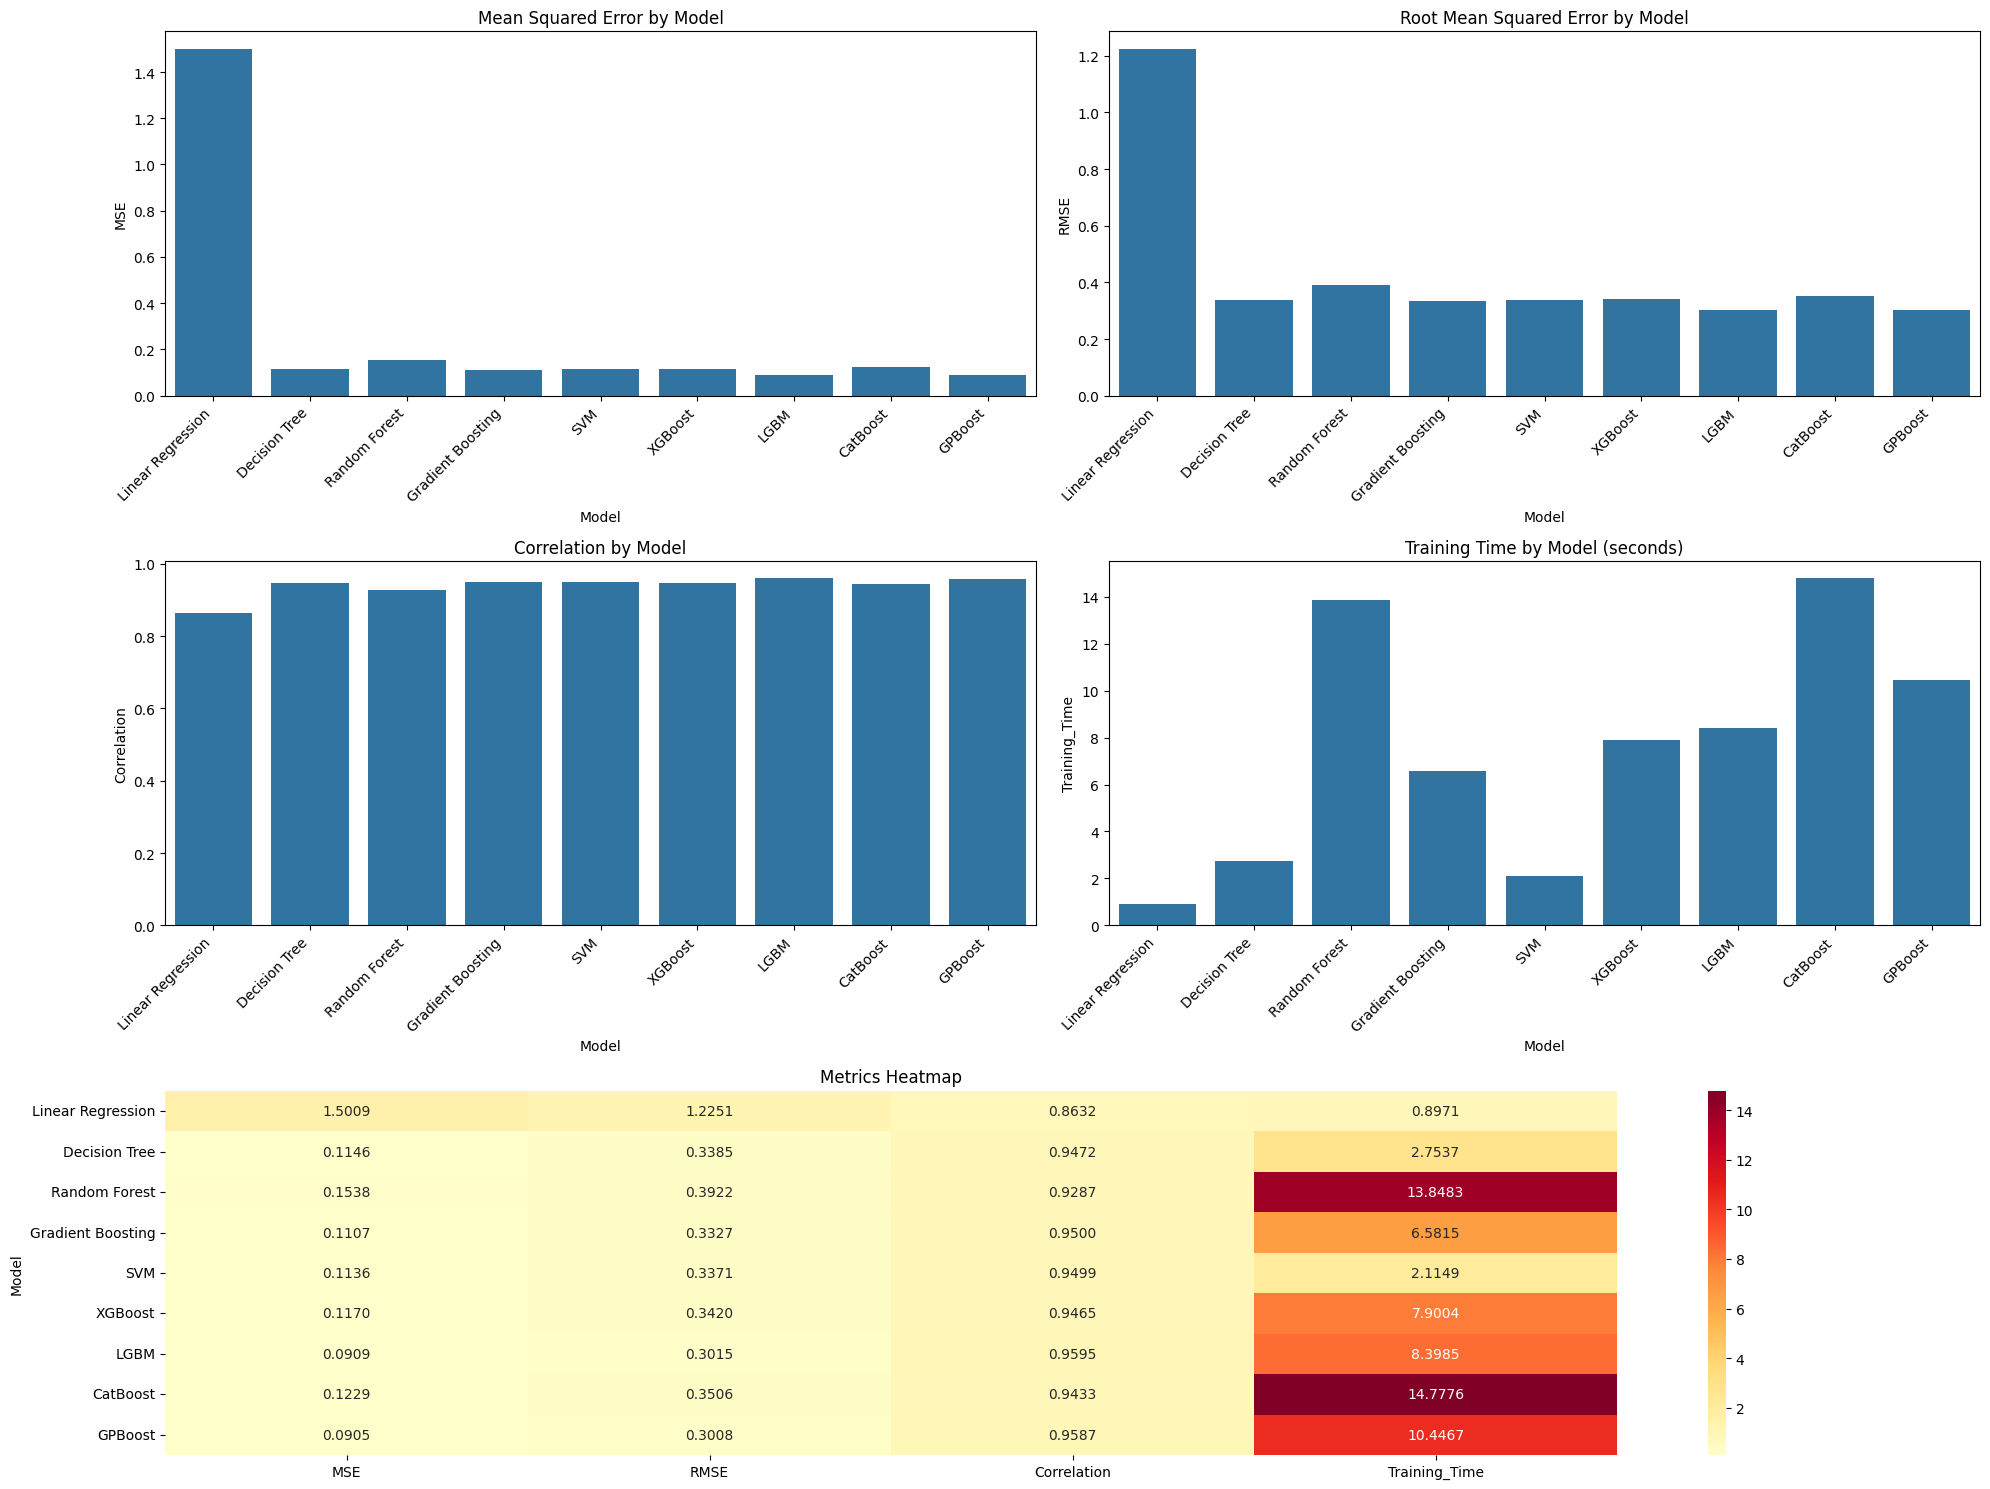

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
import time
import warnings
warnings.filterwarnings('ignore')

# Import all required models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from gpboost import GPBoostRegressor

def bayesian_optimization_tuning(x_train_scaled, y_train, x_test_scaled, y_test):
    
    def optimize_linear_regression(fit_intercept, positive):
        model = LinearRegression(
            fit_intercept=int(fit_intercept) > 0.5,
            positive=int(positive) > 0.5
        )
        return evaluate_model(model)

    def optimize_decision_tree(max_depth, min_samples_split, min_samples_leaf):
        model = DecisionTreeRegressor(
            max_depth=int(max_depth),
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf)
        )
        return evaluate_model(model)

    def optimize_random_forest(n_estimators, max_depth, min_samples_split, min_samples_leaf):
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf)
        )
        return evaluate_model(model)

    def optimize_gradient_boosting(n_estimators, max_depth, min_samples_split, min_samples_leaf):
        model = GradientBoostingRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf)
        )
        return evaluate_model(model)

    def optimize_svm(C, gamma, epsilon):
        model = SVR(
            kernel='rbf',
            C=C,
            gamma=gamma,
            epsilon=epsilon
        )
        return evaluate_model(model)

    def optimize_xgboost(learning_rate, max_depth, n_estimators, min_child_weight, gamma, subsample, colsample_bytree):
        model = XGBRegressor(
            learning_rate=learning_rate,
            max_depth=int(max_depth),
            n_estimators=int(n_estimators),
            min_child_weight=min_child_weight,
            gamma=gamma,
            subsample=subsample,
            colsample_bytree=colsample_bytree
        )
        return evaluate_model(model)

    def optimize_lgbm(learning_rate, max_depth, n_estimators, num_leaves, min_child_samples, subsample, colsample_bytree):
        model = LGBMRegressor(
            learning_rate=learning_rate,
            max_depth=int(max_depth),
            n_estimators=int(n_estimators),
            num_leaves=int(num_leaves),
            min_child_samples=int(min_child_samples),
            subsample=subsample,
            colsample_bytree=colsample_bytree
        )
        return evaluate_model(model)

    def optimize_catboost(learning_rate, depth, iterations, l2_leaf_reg):
        model = CatBoostRegressor(
            learning_rate=learning_rate,
            depth=int(depth),
            iterations=int(iterations),
            l2_leaf_reg=l2_leaf_reg,
            verbose=0
        )
        return evaluate_model(model)

    def optimize_gpboost(learning_rate, max_depth, n_estimators, num_leaves, min_child_samples, subsample, colsample_bytree, alpha, lambda_):
        model = GPBoostRegressor(
            learning_rate=learning_rate,
            max_depth=int(max_depth),
            n_estimators=int(n_estimators),
            num_leaves=int(num_leaves),
            min_child_samples=int(min_child_samples),
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            alpha=alpha,
            lambda_=lambda_
        )
        return evaluate_model(model)

    def evaluate_model(model):
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
        return -mean_squared_error(y_test, y_pred)  # Negative because we want to maximize

    # Dictionary to store results
    results = {
        'Model': [],
        'Best_Score': [],
        'MSE': [],
        'RMSE': [],
        'Correlation': [],
        'Training_Time': []
    }

    # Define optimization bounds for each model
    optimizers = {
        'Linear Regression': {
            'optimizer': BayesianOptimization(
                f=optimize_linear_regression,
                pbounds={
                    'fit_intercept': (0, 1),  # Will be converted to boolean
                    'positive': (0, 1)  # Will be converted to boolean
                },
                random_state=42
            ),
            'init_points': 5,
            'n_iter': 10
        },
        'Decision Tree': {
            'optimizer': BayesianOptimization(
                f=optimize_decision_tree,
                pbounds={
                    'max_depth': (5, 15),
                    'min_samples_split': (2, 10),
                    'min_samples_leaf': (1, 4)
                },
                random_state=42
            ),
            'init_points': 5,
            'n_iter': 20
        },
        'Random Forest': {
            'optimizer': BayesianOptimization(
                f=optimize_random_forest,
                pbounds={
                    'n_estimators': (100, 500),
                    'max_depth': (5, 15),
                    'min_samples_split': (2, 10),
                    'min_samples_leaf': (1, 4)
                },
                random_state=42
            ),
            'init_points': 5,
            'n_iter': 25
        },
        'Gradient Boosting': {
            'optimizer': BayesianOptimization(
                f=optimize_gradient_boosting,
                pbounds={
                    'n_estimators': (100, 500),
                    'max_depth': (3, 10),
                    'min_samples_split': (2, 10),
                    'min_samples_leaf': (1, 4)
                },
                random_state=42
            ),
            'init_points': 5,
            'n_iter': 25
        },
        'SVM': {
            'optimizer': BayesianOptimization(
                f=optimize_svm,
                pbounds={
                    'C': (0.1, 10.0),
                    'gamma': (0.01, 1.0),
                    'epsilon': (0.01, 1.0)
                },
                random_state=42
            ),
            'init_points': 5,
            'n_iter': 20
        },
        'XGBoost': {
            'optimizer': BayesianOptimization(
                f=optimize_xgboost,
                pbounds={
                    'learning_rate': (0.01, 0.1),
                    'max_depth': (3, 7),
                    'n_estimators': (100, 500),
                    'min_child_weight': (1, 5),
                    'gamma': (0, 1),
                    'subsample': (0.5, 0.9),
                    'colsample_bytree': (0.5, 0.9)
                },
                random_state=42
            ),
            'init_points': 5,
            'n_iter': 30
        },
        'LGBM': {
            'optimizer': BayesianOptimization(
                f=optimize_lgbm,
                pbounds={
                    'learning_rate': (0.01, 0.1),
                    'max_depth': (3, 7),
                    'n_estimators': (100, 500),
                    'num_leaves': (15, 63),
                    'min_child_samples': (1, 10),
                    'subsample': (0.5, 0.9),
                    'colsample_bytree': (0.5, 0.9)
                },
                random_state=42
            ),
            'init_points': 5,
            'n_iter': 30
        },
        'CatBoost': {
            'optimizer': BayesianOptimization(
                f=optimize_catboost,
                pbounds={
                    'learning_rate': (0.01, 0.1),
                    'depth': (3, 7),
                    'iterations': (100, 500),
                    'l2_leaf_reg': (1, 5)
                },
                random_state=42
            ),
            'init_points': 5,
            'n_iter': 25
        },
        'GPBoost': {
            'optimizer': BayesianOptimization(
                f=optimize_gpboost,
                pbounds={
                    'learning_rate': (0.01, 0.1),
                    'max_depth': (3, 7),
                    'n_estimators': (100, 500),
                    'num_leaves': (15, 63),
                    'min_child_samples': (1, 10),
                    'subsample': (0.5, 0.9),
                    'colsample_bytree': (0.5, 0.9),
                    'alpha': (0.1, 1.0),
                    'lambda_': (0.1, 1.0)  # Note: using lambda_ to avoid Python keyword conflict
                },
                random_state=42
            ),
            'init_points': 5,
            'n_iter': 35
        }
    }

    # Initialize variables to track the best model
    best_model_name = None
    best_model = None
    best_score = float('inf')  # Start with a very high score

    # Perform optimization for each model
    for model_name, opt_config in optimizers.items():
        print(f"\nOptimizing {model_name}...")
        start_time = time.time()
        
        optimizer = opt_config['optimizer']
        optimizer.maximize(
            init_points=opt_config['init_points'],
            n_iter=opt_config['n_iter']
        )
        
        training_time = time.time() - start_time
        
        # Get best model and evaluate
        best_params = optimizer.max['params']
        if model_name == 'Linear Regression':
            model = LinearRegression(
                fit_intercept=int(best_params['fit_intercept']) > 0.5,
                positive=int(best_params['positive']) > 0.5
            )
        elif model_name == 'Decision Tree':
            model = DecisionTreeRegressor(
                max_depth=int(best_params['max_depth']),
                min_samples_split=int(best_params['min_samples_split']),
                min_samples_leaf=int(best_params['min_samples_leaf'])
            )
        elif model_name == 'Random Forest':
            model = RandomForestRegressor(
                n_estimators=int(best_params['n_estimators']),
                max_depth=int(best_params['max_depth']),
                min_samples_split=int(best_params['min_samples_split']),
                min_samples_leaf=int(best_params['min_samples_leaf'])
            )
        elif model_name == 'Gradient Boosting':
            model = GradientBoostingRegressor(
                n_estimators=int(best_params['n_estimators']),
                max_depth=int(best_params['max_depth']),
                min_samples_split=int(best_params['min_samples_split']),
                min_samples_leaf=int(best_params['min_samples_leaf'])
            )
        elif model_name == 'SVM':
            model = SVR(
                C=best_params['C'],
                gamma=best_params['gamma'],
                epsilon=best_params['epsilon']
            )
        elif model_name == 'XGBoost':
            model = XGBRegressor(
                learning_rate=best_params['learning_rate'],
                max_depth=int(best_params['max_depth']),
                n_estimators=int(best_params['n_estimators']),
                min_child_weight=best_params['min_child_weight'],
                gamma=best_params['gamma'],
                subsample=best_params['subsample'],
                colsample_bytree=best_params['colsample_bytree']
            )
        elif model_name == 'LGBM':
            model = LGBMRegressor(
                learning_rate=best_params['learning_rate'],
                max_depth=int(best_params['max_depth']),
                n_estimators=int(best_params['n_estimators']),
                num_leaves=int(best_params['num_leaves']),
                min_child_samples=int(best_params['min_child_samples']),
                subsample=best_params['subsample'],
                colsample_bytree=best_params['colsample_bytree']
            )
        elif model_name == 'CatBoost':
            model = CatBoostRegressor(
                learning_rate=best_params['learning_rate'],
                depth=int(best_params['depth']),
                iterations=int(best_params['iterations']),
                l2_leaf_reg=best_params['l2_leaf_reg'],
                verbose=0
            )
        elif model_name == 'GPBoost':
            model = GPBoostRegressor(
                learning_rate=best_params['learning_rate'],
                max_depth=int(best_params['max_depth']),
                n_estimators=int(best_params['n_estimators']),
                num_leaves=int(best_params['num_leaves']),
                min_child_samples=int(best_params['min_child_samples']),
                subsample=best_params['subsample'],
                colsample_bytree=best_params['colsample_bytree'],
                alpha=best_params['alpha'],
                lambda_=best_params['lambda_']
            )
        
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
        
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        correlation = np.corrcoef(y_test, y_pred)[0,1]
        
        results['Model'].append(model_name)
        results['Best_Score'].append(-optimizer.max['target'])
        results['MSE'].append(mse)
        results['RMSE'].append(rmse)
        results['Correlation'].append(correlation)
        results['Training_Time'].append(training_time)
        
        print(f"\nBest parameters: {best_params}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"Correlation: {correlation:.4f}")
        print(f"Training Time: {training_time:.2f} seconds")

        # Update the best model if this one is better
        if mse < best_score:
            best_score = mse
            best_model_name = model_name
            best_model = model

    # Print the best model summary
    print(f"\nBest Model: {best_model_name}")
    print(f"Best Model Parameters: {best_model.get_params()}")
    print(f"Best Model MSE: {best_score:.4f}")

    # Create visualizations
    results_df = pd.DataFrame(results)
    
    # Plotting functions
    plt.figure(figsize=(20, 15))
    
    # MSE Plot
    plt.subplot(321)
    sns.barplot(x='Model', y='MSE', data=results_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Mean Squared Error by Model')
    
    # RMSE Plot
    plt.subplot(322)
    sns.barplot(x='Model', y='RMSE', data=results_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Root Mean Squared Error by Model')
    
    # Correlation Plot
    plt.subplot(323)
    sns.barplot(x='Model', y='Correlation', data=results_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Correlation by Model')
    
    # Training Time Plot
    plt.subplot(324)
    sns.barplot(x='Model', y='Training_Time', data=results_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Training Time by Model (seconds)')
    
    # Metrics Heatmap
    plt.subplot(313)
    metrics_df = results_df[['MSE', 'RMSE', 'Correlation', 'Training_Time']]
    metrics_df.index = results_df['Model']
    sns.heatmap(metrics_df, annot=True, cmap='YlOrRd', fmt='.4f')
    plt.title('Metrics Heatmap')
    
    plt.tight_layout()
    plt.show()
    
    return results_df

# Assuming x_train_scaled, y_train, x_test_scaled, y_test are defined
results = bayesian_optimization_tuning(x_train_scaled, y_train, x_test_scaled, y_test)